# More complex velocity potentials

In this notebook we explore examples of velocity potentials for complex fluid flows

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Example 1 - Rankine Ovoid (2D)

The velocity potential for a uniform flow combined with a source and a sink is given as

$$ \Phi(\mathbf{r}) = cx - \frac{m}{4\pi\sqrt{(x+d)^2+y^2}} + \frac{m}{4\pi\sqrt{(x-d)^2+y^2}} $$

Let $m = 1/d$:

In [2]:
def potential(x,y,c,d): 
    Phi = c*x-1/(d*4*np.pi*((x-d)**2+y**2)**(1/2)) + 1/(d*4*np.pi*((x+d)**2+y**2)**(1/2))
    return Phi

The velocity vector is then $\mathbf{u}=\nabla\Phi$ or

$$ \mathbf{u} = \begin{bmatrix} c + \frac{(x+d)m}{4\pi((x+d)^2+y^2)^{\frac{3}{2}}} - \frac{(x-d)m}{4\pi((x-d)^2+y^2)^{\frac{3}{2}}} \\ 
\frac{ym}{4\pi((x+d)^2+y^2)^{\frac{3}{2}}} - \frac{ym}{4\pi((x-d)^2+y^2)^{\frac{3}{2}}} \end{bmatrix} $$

In [3]:
def velocity(x,y,c,d):
    N = np.shape(x) 
    u = c*np.ones(N)+(x+d)/(d*4*np.pi*((x+d)**2+y**2)**(3/2)) - (x-d)/(d*4*np.pi*((x-d)**2+y**2)**(3/2))
    v = y/(d*4*np.pi*((x+d)**2+y**2)**(3/2)) - y/(d*4*np.pi*((x-d)**2+y**2)**(3/2))
    U = np.array([u,v])
    return U

In [4]:
velocity(0,0,1,0.5)

array([2.27323954, 0.        ])

Let $c=1$ and $d=0.5$

In [5]:
c = 1
d = 0.5

### Calculate velocity on gridded domain

In [82]:
x = np.linspace(-1.5,1.5,20)
y = np.linspace(-1.5,1.5,20)
X,Y = np.meshgrid(x,y)

In [83]:
U = velocity(X,Y,c,d)

In [84]:
U.shape

(2, 20, 20)

In [85]:
u = U[0,:,:]
v = U[1,:,:]

In [86]:
u.shape

(20, 20)

Text(0.5, 0, 'x')

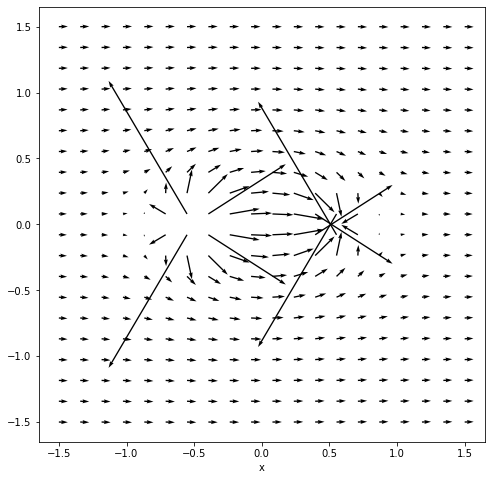

In [87]:
fig = plt.figure(figsize=(8,8))
plt.quiver(X,Y,u,v);
plt.xlabel('x')

In [88]:
print(np.max(np.abs(u)),np.max(np.abs(v)))

8.6638010355226 14.698669806633555


In [89]:
for ii in np.arange(0,u.shape[0]):
    for jj in np.arange(0,u.shape[1]):
        if abs(u[ii,jj])>20:
            u[ii,jj]=np.NaN
        if abs(v[ii,jj])>20:
            v[ii,jj]=np.NaN

Text(0.5, 0, 'x')

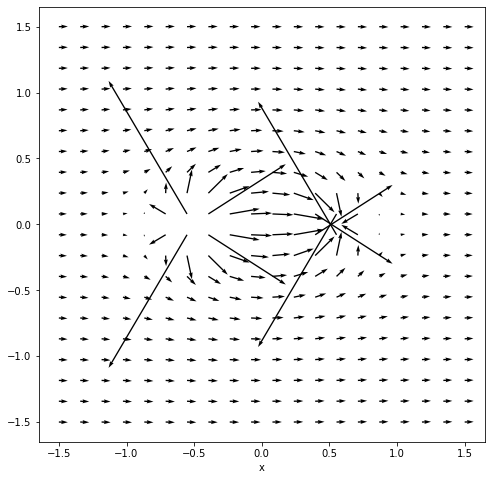

In [90]:
ax = plt.figure(figsize=(8,8))

plt.quiver(X,Y,u,v);
plt.xlabel('x')

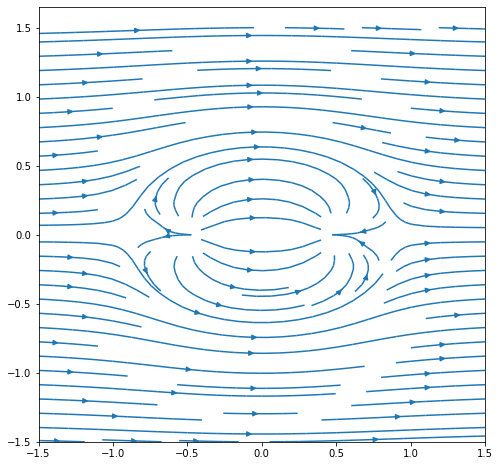

In [91]:
fig = plt.figure(figsize=(8,8))
plt.streamplot(X,Y,u,v);

### Calculate velocity potential

In [92]:
Phi = potential(X,Y,c,d)

### Plot velocity potential

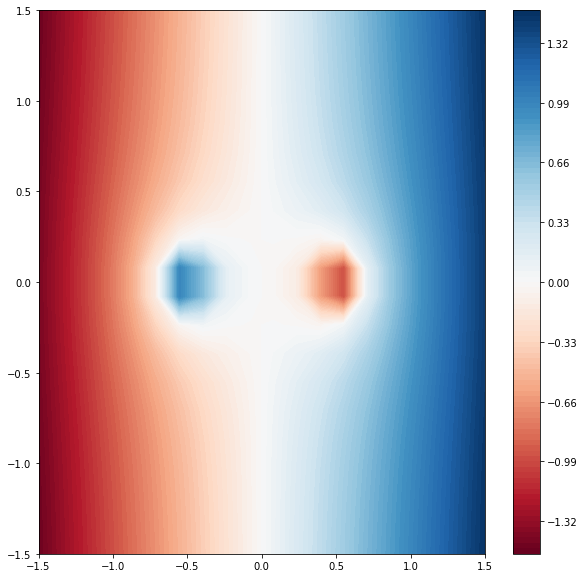

In [93]:
fig = plt.figure(figsize=(10,10))
p = plt.contourf(X,Y,Phi,cmap='RdBu',levels=100)
plt.colorbar(p)

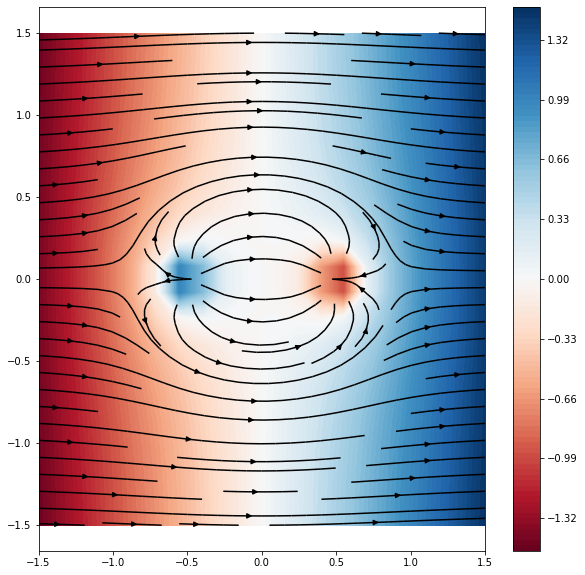

In [94]:
fig = plt.figure(figsize=(10,10))
p = plt.contourf(X,Y,Phi,cmap='RdBu',levels=100)
plt.streamplot(X,Y,u,v,color='k');
plt.colorbar(p)

Text(0.5, 0, 'x')

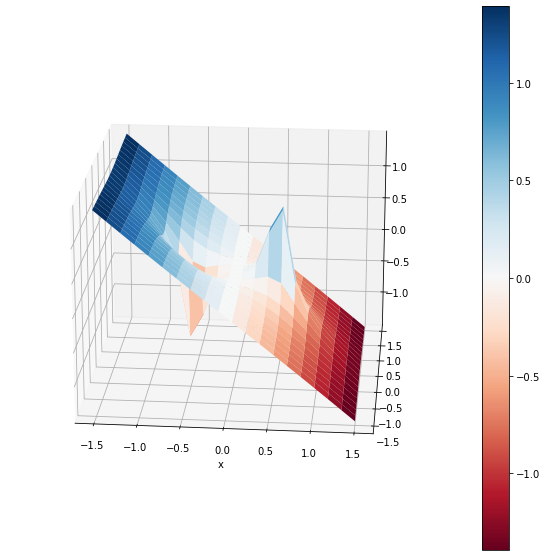

In [95]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
p = ax.plot_surface(X,Y,-Phi,cmap='RdBu')
#plt.streamplot(X,Y,u,v,color='k');
plt.colorbar(p)
ax.view_init(20,275)
plt.xlabel('x')

### Calculate vorticity

Using unmasked velocity (no NaN values)

In [96]:
u = U[0,:,:]
v = U[1,:,:]

In [97]:
dx = x[1]-x[0]
dy = y[1]-y[0]

du = u[1:,1:]-u[1:,:-1]
dv = v[1:,1:]-v[:-1,1:]

zeta = dv/dx - du/dy

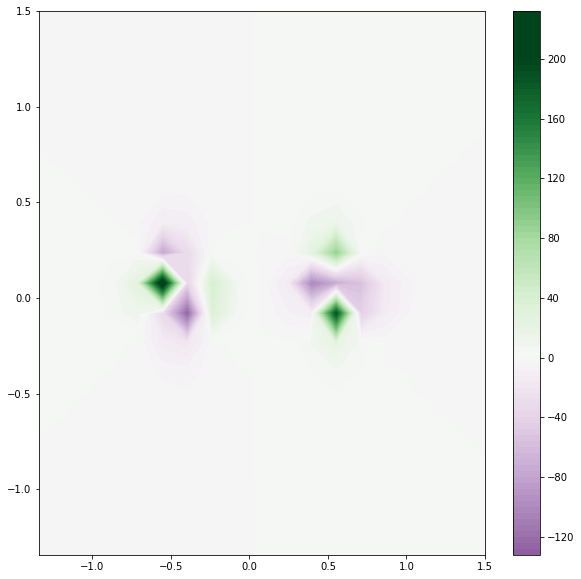

In [101]:
fig = plt.figure(figsize=(10,10))
p = plt.contourf(X[1:,1:],Y[1:,1:],zeta,cmap='PRGn',levels=100)
plt.clim([-200,200])
plt.colorbar(p)